## 🚴 Business Task: Ways  that Casuals Differ from Annual members, so that the marketing team lead by Moreno use those ways to reach casuals to opt for anual membership. 

In [35]:
import pandas as pd
import os

# Set the path of the folder containing the CSV files
path = '/Users/abdihakin/Desktop/GoogleCapstone/data'

# Create an empty list to store the DataFrames
df_list = []

# Loop through each file in the folder
for file in os.listdir(path):
    if file.endswith('.csv'):
        # Read the CSV file into a DataFrame and append it to the list
        df_list.append(pd.read_csv(os.path.join(path, file), low_memory=False))

# Concatenate all DataFrames in the list into a single DataFrame
df_sample= pd.concat(df_list, ignore_index=True)
df_sample

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,NaN,NaN,NaN,NaN,41.890000,-87.680000,41.89000,-87.670000,casual
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,NaN,NaN,NaN,NaN,41.940000,-87.640000,41.98000,-87.670000,casual
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,NaN,NaN,NaN,NaN,41.810000,-87.720000,41.80000,-87.720000,casual
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,NaN,NaN,NaN,NaN,41.800000,-87.720000,41.81000,-87.720000,casual
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,NaN,NaN,NaN,NaN,41.880000,-87.740000,41.88000,-87.710000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595058,EF56D7D1D612AC11,electric_bike,2021-05-20 16:32:14,2021-05-20 16:35:39,Blackstone Ave & Hyde Park Blvd,13398,NaN,NaN,41.802581,-87.590230,41.80000,-87.600000,member
5595059,745191CB9F21DE3C,classic_bike,2021-05-29 16:40:37,2021-05-29 17:22:37,Sheridan Rd & Montrose Ave,TA1307000107,Michigan Ave & Oak St,13042,41.961670,-87.654640,41.90096,-87.623777,casual
5595060,428575BAA5356BFF,electric_bike,2021-05-31 14:24:54,2021-05-31 14:31:38,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961525,-87.654651,41.95000,-87.650000,member
5595061,FC8A4A7AB7249662,electric_bike,2021-05-25 16:01:33,2021-05-25 16:07:37,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961654,-87.654721,41.98000,-87.660000,member


# 🧹  CLEANING PROCESS

#### 

Based on our analysis, we have identified the following cleaning tasks that need to be performed on the data:

1.Convert columns started_at and ended_at to datetime format.

2.Change the data type of member_casual and rideable_type columns to category.

3.Drop rows with missing values.

4.Remove duplicate rows.

Performing these tasks will ensure that our data is in a clean and consistent format, which will make it easier to analyze and draw insights from. below function will do the above listed task.


In [36]:
cols = df_sample.columns

def tweak_df(df):
    return(df
        .assign(
            started_at = pd.to_datetime(df.started_at),
            ended_at = pd.to_datetime(df.ended_at),
        )
        .astype({'member_casual': 'category', 'rideable_type': 'category'})
        .dropna()
        .drop_duplicates()
    )

df_sample = tweak_df(df_sample)
df_sample['delta'] = (df_sample.iloc[:, 3] - df_sample.iloc[:, 2])
dd = round((pd.to_datetime(df_sample["ended_at"]) - pd.to_datetime(df_sample["started_at"])).dt.total_seconds() / 60, 2)
df_sample.insert(2, "hire_time_minutes", dd)

df_sample['day_of_week'] = df_sample['started_at'].dt.day_name()
df_sample['month_of_year'] = df_sample['started_at'].dt.month_name()

df_sample.head()


,ride_id,rideable_type,hire_time_minutes,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,delta,day_of_week,month_of_year
59,E92C804563F261EC,classic_bike,10.63,2021-09-05 01:25:08,2021-09-05 01:35:46,Wells St & Walton St,TA1306000011,Desplaines St & Kinzie St,TA1306000003,41.899930,-87.634430,41.888716,-87.644448,casual,0 days 00:10:38,Sunday,September
61,9ECA91210441E847,classic_bike,32.45,2021-09-05 13:33:41,2021-09-05 14:06:08,Larrabee St & Armitage Ave,TA1309000006,Clark St & Leland Ave,TA1309000014,41.918084,-87.643749,41.967096,-87.667429,casual,0 days 00:32:27,Sunday,September
153,3DAA144C4E85E3AA,classic_bike,9.65,2021-09-04 23:00:21,2021-09-04 23:10:00,Dearborn St & Monroe St,TA1305000006,Dearborn St & Monroe St,TA1305000006,41.881320,-87.629521,41.881320,-87.629521,casual,0 days 00:09:39,Saturday,September
180,53B99FE9BD0D35F8,classic_bike,9.78,2021-09-14 16:25:16,2021-09-14 16:35:03,Kingsbury St & Kinzie St,KA1503000043,Orleans St & Elm St,TA1306000006,41.889177,-87.638506,41.902924,-87.637715,casual,0 days 00:09:47,Tuesday,September
182,2DB60C25C8CE3591,classic_bike,0.07,2021-09-13 22:34:54,2021-09-13 22:34:58,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,41.900960,-87.623777,casual,0 days 00:00:04,Monday,September


In [38]:
# Create a dictionary to map months to seasons
seasons = {'January': 'Winter', 'February': 'Winter', 'March': 'Spring', 'April': 'Spring', 'May': 'Spring', 'June': 'Summer', 'July': 'Summer', 'August': 'Summer', 'September': 'Fall', 'October': 'Fall', 'November': 'Fall', 'December': 'Winter'}

# Add a new column 'season' to the dataframe and map the 'month_of_year' column to the corresponding season
df_sample['season'] = df_sample['month_of_year'].map(seasons)

In [39]:
# Extracting the hour component of the 'started_at' column and storing it in a new column 'start_hour'
df_sample['start_hour'] = df_sample['started_at'].dt.hour

# Defining a function to map hours to time of day categories and applying it to the 'start_hour' column
def get_time_of_day(hour):
    if hour >= 5 and hour < 12:
        return 'Morning'
    elif hour >= 12 and hour < 17:
        return 'Afternoon'
    elif hour >= 17 and hour < 21:
        return 'Evening'
    else:
        return 'Night'
        
df_sample['time_of_day'] = df_sample['start_hour'].apply(get_time_of_day)


In [40]:
# Importing the required functions from the numpy module
from numpy import sin, cos, sqrt, arcsin, radians

# Defining a function to calculate the Haversine distance between two geographic coordinates
def haversine_distance(df):
    # Extracting the start and end latitude and longitude values from the input DataFrame and storing them as separate variables
    lat1, lng1, lat2, lng2 = df[['start_lat', 'start_lng', 'end_lat', 'end_lng']].values.T
    # Defining the radius of the Earth in kilometers
    earth_radius = 6371
    # Converting the latitude and longitude values from degrees to radians
    lat1, lng1, lat2, lng2 = radians(lat1), radians(lng1), radians(lat2), radians(lng2)
    # Calculating the differences in latitude and longitude values
    dlat = lat2 - lat1
    dlng = lng2 - lng1
    # Applying the Haversine formula to calculate the distance between the two coordinates
    a = sin(dlat/2.0)**2 + cos(lat1) * cos(lat2) * sin(dlng/2.0)**2
    return earth_radius * 2 * arcsin(sqrt(a))

# Applying the 'haversine_distance' function to the 'df_sample' DataFrame and storing the result in a new column 'distance'
df_sample['distance'] = haversine_distance(df_sample)



In [41]:
from scipy import stats

# Calculate z-scores for hire_time_minutes and distance columns
df_sample['hire_time_zscore'] = stats.zscore(df_sample['hire_time_minutes'])
df_sample['distance_zscore'] = stats.zscore(df_sample['distance'])

# Remove rows with z-scores greater than 3 or less than -3
df_sample = df_sample.loc[(abs(df_sample['hire_time_zscore']) < 3) & (abs(df_sample['distance_zscore']) < 3)]

# Drop the z-score columns
df_sample.drop(columns=['hire_time_zscore', 'distance_zscore'], inplace=True)
df_sample.shape

/var/folders/j2/8nkm6kh168d3cbx7tv8t9mkw0000gn/T/ipykernel_35957/1842921081.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample.drop(columns=['hire_time_zscore', 'distance_zscore'], inplace=True)


(4498706, 21)

In [46]:
#  removes any rows from the DataFrame where the value in the 'hire_time_minutes' column is less than zero. 
df_sample = df_sample[df_sample['hire_time_minutes'] >= 0]

In [47]:
df_sample.to_csv('df_sample.csv')

# 🚀 Analysis

In [16]:
df_sample.head()

,ride_id,rideable_type,hire_time_minutes,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,month_of_year,season,start_hour,time_of_day,distance
59,E92C804563F261EC,classic_bike,10.63,2021-09-05 01:25:08,2021-09-05 01:35:46,Wells St & Walton St,TA1306000011,Desplaines St & Kinzie St,TA1306000003,41.899930,-87.634430,41.888716,-87.644448,casual,Sunday,September,Fall,1,Night,1.497463
61,9ECA91210441E847,classic_bike,32.45,2021-09-05 13:33:41,2021-09-05 14:06:08,Larrabee St & Armitage Ave,TA1309000006,Clark St & Leland Ave,TA1309000014,41.918084,-87.643749,41.967096,-87.667429,casual,Sunday,September,Fall,13,Afternoon,5.791124
153,3DAA144C4E85E3AA,classic_bike,9.65,2021-09-04 23:00:21,2021-09-04 23:10:00,Dearborn St & Monroe St,TA1305000006,Dearborn St & Monroe St,TA1305000006,41.881320,-87.629521,41.881320,-87.629521,casual,Saturday,September,Fall,23,Night,0.000000
180,53B99FE9BD0D35F8,classic_bike,9.78,2021-09-14 16:25:16,2021-09-14 16:35:03,Kingsbury St & Kinzie St,KA1503000043,Orleans St & Elm St,TA1306000006,41.889177,-87.638506,41.902924,-87.637715,casual,Tuesday,September,Fall,16,Afternoon,1.530016
182,2DB60C25C8CE3591,classic_bike,0.07,2021-09-13 22:34:54,2021-09-13 22:34:58,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,41.900960,-87.623777,casual,Monday,September,Fall,22,Night,0.000000


In [12]:
# Group the data by user type and calculate the average hire time
df_avg_hire_time_user = df_sample.groupby('member_casual')['hire_time_minutes'].mean().reset_index()

df_avg_hire_time=df_sample.hire_time_minutes.mean()
# Print the result
print('Average hire time ',df_avg_hire_time)
print('Average hire time per user type:\n', df_avg_hire_time_user)


Average hire time  18.566676365999438
Average hire time per user type:
   member_casual  hire_time_minutes
0        casual          26.027375
1        member          12.590175


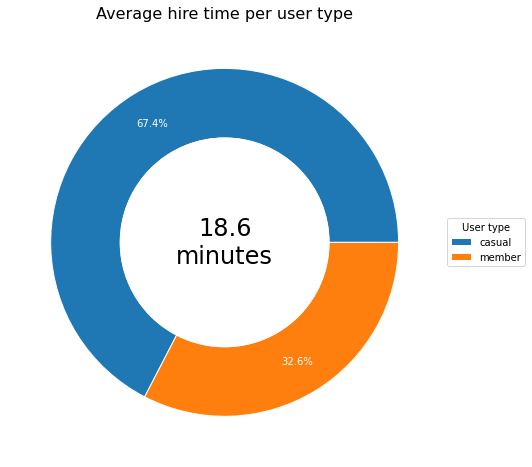

In [80]:
import matplotlib.pyplot as plt

# Group the data by user type and calculate the average hire time
df_avg_hire_time_user = df_sample.groupby('member_casual')['hire_time_minutes'].mean().reset_index()

df_avg_hire_time=df_sample.hire_time_minutes.mean()

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 8))

# Set the chart title
ax.set_title('Average hire time per user type', fontsize=16)

# Create the donut chart
wedges, texts, autotexts = ax.pie(df_avg_hire_time_user['hire_time_minutes'], 
                                  autopct='%1.1f%%', 
                                  textprops=dict(color="w"),
                                  colors=['#1f77b4', '#ff7f0e'], 
                                  radius=1, 
                                  pctdistance=0.8, 
                                  wedgeprops=dict(width=0.4, edgecolor='w'))

# Set the center circle
circle = plt.Circle((0, 0), 0.6, color='white')
ax.add_artist(circle)

# Add the overall average hire time to the center circle
ax.text(0, 0, '{:.1f}\nminutes'.format(df_avg_hire_time), 
        fontsize=24, 
        ha='center', 
        va='center')

# Add a legend
ax.legend(wedges, df_avg_hire_time_user['member_casual'], 
          title='User type', 
          loc='center left', 
          bbox_to_anchor=(1, 0, 0.5, 1))
# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove ticks from top and right spines
ax.tick_params(top=False, right=False)
plt.show()



### 🔍 The analysis revealed that, on average, users hired Cyclistic bikes for approximately 18.6 minutes. However, there was a significant difference in the average hire time between casual riders and annual members, with casual riders having an average hire time of 26 minutes and annual members having an average hire time of 12.6 minutes. This suggests that there may be different usage patterns and motivations for these two user types, which could inform targeted marketing strategies to convert casual riders into annual members.

In [48]:
# Group by season and calculate the average hire duration
df_sample.groupby(['season'])['hire_time_minutes'].mean()

season
Fall      16.232304
Spring    20.500611
Summer    20.094600
Winter    13.010881
Name: hire_time_minutes, dtype: float64

The above shows the average hire duration for each season: Fall is 16.23 minutes, Spring is 20.50 minutes, Summer is 20.09 minutes, and Winter is 13.01 minutes.





In [49]:
# Group by season and calculate the average hire duration
season_avg = df_sample.groupby(['season','member_casual'])['hire_time_minutes'].mean()

season_avg


season  member_casual
Fall    casual           22.905111
        member           11.677565
Spring  casual           29.786255
        member           13.481043
Summer  casual           26.630196
        member           13.224979
Winter  casual           19.691852
        member           11.070655
Name: hire_time_minutes, dtype: float64

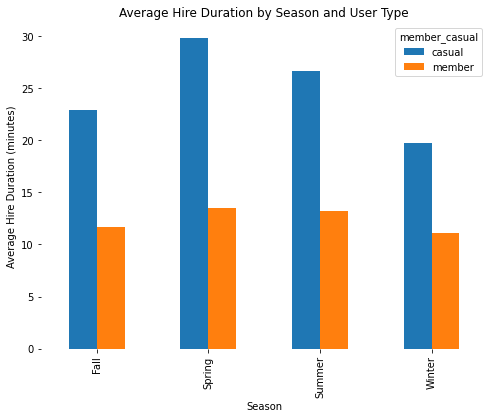

In [79]:
import matplotlib.pyplot as plt

# Pivot the data to create separate columns for member_casual
pivot_season_avg = season_avg.reset_index().pivot(index='season', columns='member_casual', values='hire_time_minutes')

# Plot the bar chart
ax = pivot_season_avg.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], figsize=(8, 6))

# Set the title and axis labels
ax.set_title('Average Hire Duration by Season and User Type')
ax.set_xlabel('Season')
ax.set_ylabel('Average Hire Duration (minutes)')

# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove ticks from top and right spines
ax.tick_params(top=False, right=False)

# Show the plot
plt.show()


### 🔍  Based on the analysis of the average hire time by season per user type, it is clear that casual riders take longer to use the bikes during each season compared to annual members. The longest average hire time was observed in Spring for casual riders, with an average hire time of 29 Min, while for annual members it was during Summer, with an average hire time of 13 Min. The shortest average hire time for both user types was observed during Winter.

In [50]:
# group the data by each month
df_sample.groupby(['month_of_year'])['hire_time_minutes'].mean()


month_of_year
April        19.891056
August       19.166721
December     12.231719
February     16.193522
January      13.025277
July         20.336628
June         20.847968
March        18.971775
May          21.603266
November     12.660297
October      15.824086
September    18.028864
Name: hire_time_minutes, dtype: float64

In [51]:
# Group by month and calculate the average hire duration

month_avg = df_sample.groupby(['month_of_year','member_casual'])['hire_time_minutes'].mean()

month_avg


month_of_year  member_casual
April          casual           29.260285
               member           13.587915
August         casual           25.231133
               member           12.981635
December       casual           18.334090
               member           10.144940
February       casual           26.508796
               member           13.636268
January        casual           19.900444
               member           11.559961
July           casual           26.612132
               member           13.190991
June           casual           28.224691
               member           13.527160
March          casual           29.212788
               member           13.073545
May            casual           30.278820
               member           13.626648
November       casual           18.577854
               member           10.444654
October        casual           22.470363
               member           11.503141
September      casual           24.226736
     

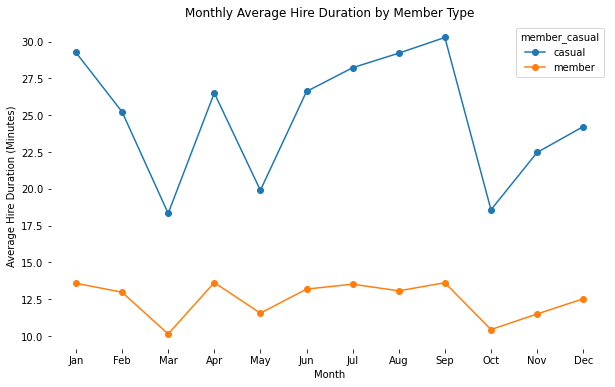

In [78]:


# Define the list of month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Group by month and calculate the average hire duration
month_avg = df_sample.groupby(['month_of_year', 'member_casual'])['hire_time_minutes'].mean()

# Convert the groupby object into a DataFrame
month_avg = month_avg.unstack()

# Plot the line chart
ax = month_avg.plot(kind='line', figsize=(10, 6), marker='o')
ax.set_title('Monthly Average Hire Duration by Member Type')
ax.set_xlabel('Month')
ax.set_ylabel('Average Hire Duration (Minutes)')

# Set the x-tick locations and labels
ax.set_xticks(range(len(months)))
ax.set_xticklabels(months)

# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove ticks from top and right spines
ax.tick_params(top=False, right=False)

plt.show()




### 🔍  Based on the analysis of the average hire time by month and user type, it is clear that casual riders take longer to use the bikes during each month compared to annual members.In terms of months, the longest hire times for both casual and annual members occur in May, followed by June and April, while the shortest hire times occur in February, April, and may.

In [52]:
# GRoup the data by day of the week
df_sample.groupby(['day_of_week'])['hire_time_minutes'].mean()


day_of_week
Friday       17.455615
Monday       17.918767
Saturday     22.016303
Sunday       23.219920
Thursday     15.671776
Tuesday      16.030438
Wednesday    15.670784
Name: hire_time_minutes, dtype: float64

In [53]:
# Group by day of the week and calculate the average hire duration

day_avg = df_sample.groupby(['day_of_week','member_casual'])['hire_time_minutes'].mean()

day_avg


day_of_week  member_casual
Friday       casual           24.058934
             member           12.247215
Monday       casual           26.677602
             member           12.164144
Saturday     casual           28.068914
             member           14.143397
Sunday       casual           30.029821
             member           14.470165
Thursday     casual           22.136826
             member           11.807235
Tuesday      casual           23.639579
             member           11.835654
Wednesday    casual           22.597574
             member           11.886530
Name: hire_time_minutes, dtype: float64

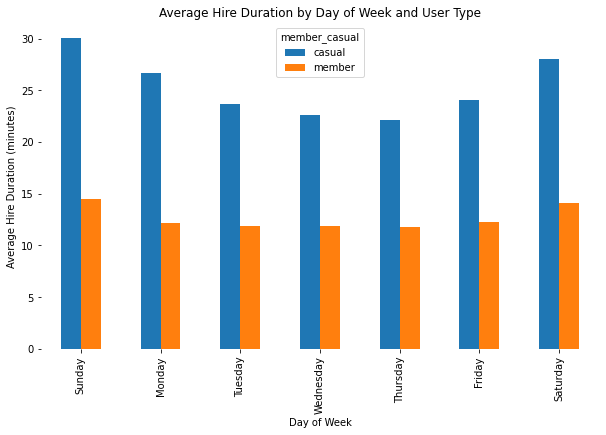

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of weekdays in order
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Group by day of the week and calculate the average hire duration
day_avg = df_sample.groupby(['day_of_week','member_casual'])['hire_time_minutes'].mean()

# Convert the multi-index Series to a DataFrame and set the weekday order
df_day_avg = day_avg.unstack().reindex(pd.Categorical(weekdays, categories=weekdays, ordered=True))

# Plot the grouped bar chart
ax = df_day_avg.plot(kind='bar', figsize=(10,6))

# Add labels and titles
ax.set_xlabel('Day of Week')
ax.set_ylabel('Average Hire Duration (minutes)')
ax.set_title('Average Hire Duration by Day of Week and User Type')

# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove ticks from top and right spines
ax.tick_params(top=False, right=False)

plt.show()


### 🔍  Based on the analysis of the average hire time by day of the week and user type, it is clear that casual riders take longer to use the bikes during each day compared to annual members. On average, casual riders take approximately 12 minutes more per ride than annual members.Additionally, it appears that there is a trend of longer hire times on weekends (Saturday and Sunday) for both casual and annual members compared to weekdays (Monday to Friday). The longest hire times occur on Sundays for both user types, while the shortest hire times occur on Thursdays for casual riders and Mondays for annual members.

In [255]:
df_sample.groupby([ 'start_hour'])['hire_time_minutes'].mean()


start_hour
0     19.661793
1     19.830674
2     20.509510
3     21.339355
4     16.769982
5     12.311484
6     12.388476
7     12.789002
8     13.613419
9     17.035852
10    20.224911
11    21.026605
12    20.657180
13    21.610623
14    21.714415
15    20.424592
16    18.811143
17    17.743989
18    17.545080
19    17.893022
20    18.190632
21    18.117845
22    18.317462
23    18.766520
Name: hire_time_minutes, dtype: float64

In [259]:

# group the data by user type and time of day and calculate the mean hire duration
avg_duration_by_type_time = df_sample.groupby(['member_casual', 'start_hour'])['hire_time_minutes'].mean()

# print the result
avg_duration_by_type_time.head()


member_casual  start_hour
casual         0             24.262942
               1             23.720563
               2             24.076899
               3             25.608713
               4             21.960257
               5             19.082263
               6             17.156939
               7             18.028733
               8             20.712149
               9             26.452941
               10            29.783503
               11            30.380885
               12            29.561456
               13            30.485656
               14            30.024547
               15            28.355837
               16            26.323209
               17            24.202802
               18            23.379786
               19            23.843801
               20            24.158474
               21            23.518829
               22            22.956585
Name: hire_time_minutes, dtype: float64

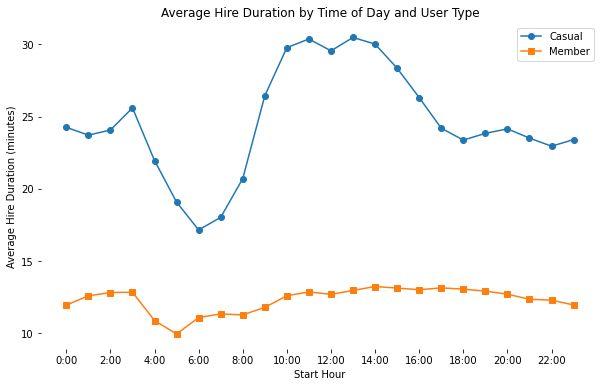

In [88]:
# Group the data by user type and time of day and calculate the mean hire duration
avg_duration_by_type_time = df_sample.groupby(['member_casual', 'start_hour'])['hire_time_minutes'].mean()

# Pivot the data to create separate columns for casual and member riders
df_pivot = avg_duration_by_type_time.unstack(level=0)

# Create the line chart with markers
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_pivot['casual'], label='Casual', marker='o')
ax.plot(df_pivot['member'], label='Member', marker='s')

# Set tick values and labels for the x-axis
ax.set_xticks(range(0, 24, 2))
ax.set_xticklabels([f'{hour}:00' for hour in range(0, 24, 2)])

# Add labels and title
ax.set_xlabel('Start Hour')
ax.set_ylabel('Average Hire Duration (minutes)')
ax.set_title('Average Hire Duration by Time of Day and User Type')

# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove ticks from top and right spines
ax.tick_params(top=False, right=False)

# Add legend
ax.legend()

# Show the chart
plt.show()



In [258]:
df_sample.groupby(['member_casual', 'time_of_day'])['hire_time_minutes'].mean()

member_casual  time_of_day
casual         Afternoon      28.846202
               Evening        23.875442
               Morning        26.134006
               Night          23.550191
member         Afternoon      13.012288
               Evening        13.010656
               Morning        11.775335
               Night          12.239164
Name: hire_time_minutes, dtype: float64

### 🔍 The data reveals that casual riders tend to have longer ride durations during the early morning hours, peaking at around 3am with an average of 25.6 minutes. After that, the duration gradually decreases until it reaches its lowest point at 5am with an average of 19.1 minutes, and then increases steadily again until it peaks in the late morning and early afternoon hours.On the other hand, for annual members, the ride duration remains relatively consistent throughout the day, with a slight peak during the mid-morning and early afternoon hours. The average ride duration for annual members is much lower than that of casual riders, with a peak of only 13.2 minutes in the 2pm hour.

# Let's shitf our Gears and focus on Distance covered 

In [214]:
# Sum of distance covered 
df_sample.distance.sum()

8924262.422710313

In [228]:
# Sum of distance covered each user 
df_sample.groupby('member_casual').distance.sum()

member_casual
casual    4.019781e+06
member    4.904482e+06
Name: distance, dtype: float64

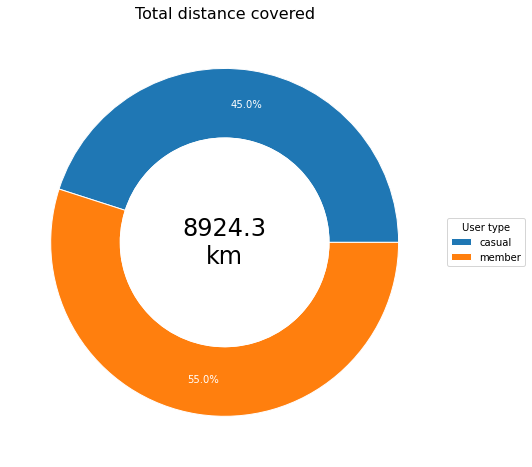

In [91]:
import matplotlib.pyplot as plt

# Group the data by user type and calculate the total distance covered
df_total_distance_user = df_sample.groupby('member_casual')['distance'].sum().reset_index()

# Calculate the overall total distance covered
total_distance = df_sample.distance.sum()

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 8))

# Set the chart title
ax.set_title('Total distance covered', fontsize=16)

# Create the donut chart
wedges, texts, autotexts = ax.pie(df_total_distance_user['distance'], 
                                  autopct='%1.1f%%', 
                                  textprops=dict(color="w"),
                                  colors=['#1f77b4', '#ff7f0e'], 
                                  radius=1, 
                                  pctdistance=0.8, 
                                  wedgeprops=dict(width=0.4, edgecolor='w'))

# Set the center circle
circle = plt.Circle((0, 0), 0.6, color='white')
ax.add_artist(circle)

# Add the overall total distance covered to the center circle
ax.text(0, 0, '{:.1f}\nkm'.format(total_distance/1000), 
        fontsize=24, 
        ha='center', 
        va='center')

# Add a legend
ax.legend(wedges, df_total_distance_user['member_casual'], 
          title='User type', 
          loc='center left', 
          bbox_to_anchor=(1, 0, 0.5, 1))

# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove ticks from top and right spines
ax.tick_params(top=False, right=False)

plt.show()


### 🔍  Member riders covered approximately 18% more distance than casual riders, with members covering a total of 4.9 M kilometers compared to 4.0 M kilometers covered by casual riders. 

In [215]:
# Sum of distance covered by season
season_distance = df_sample.groupby('season')['distance'].sum()
print(season_distance)


season
Fall      2.591848e+06
Spring    1.845380e+06
Summer    3.950196e+06
Winter    5.368384e+05
Name: distance, dtype: float64


In [217]:
# Sum of distance covered per user for each season
season_distance = df_sample.groupby(['season', 'member_casual'])['distance'].sum()
season_distance


season  member_casual
Fall    casual           1.101039e+06
        member           1.490809e+06
Spring  casual           7.690564e+05
        member           1.076323e+06
Summer  casual           2.027362e+06
        member           1.922834e+06
Winter  casual           1.223237e+05
        member           4.145147e+05
Name: distance, dtype: float64

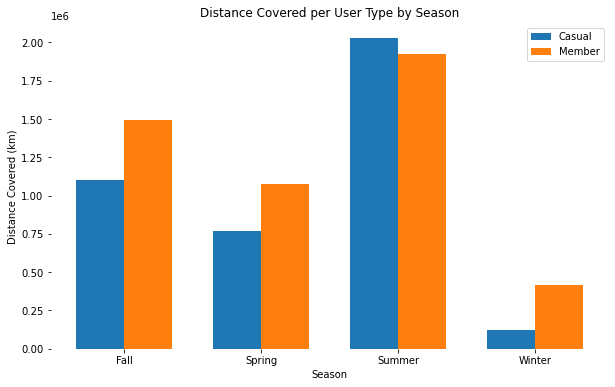

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Sum of distance covered per user for each season
season_distance = df_sample.groupby(['season', 'member_casual'])['distance'].sum()

# Pivot the data to create separate columns for casual and member riders
df_pivot = season_distance.unstack(level=1)

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
seasons = df_pivot.index
x = np.arange(len(seasons))
casual = ax.bar(x - width/2, df_pivot['casual'], width, label='Casual')
member = ax.bar(x + width/2, df_pivot['member'], width, label='Member')

# Add labels and title
ax.set_xlabel('Season')
ax.set_ylabel('Distance Covered (km)')
ax.set_title('Distance Covered per User Type by Season')

# Add x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(seasons)

# Add legend and grid
ax.legend()
# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove ticks from top and right spines
ax.tick_params(top=False, right=False)

# Show the chart
plt.show()


### 🔍  In the summer season, casual riders covered more distance than members, while in all other seasons, members covered significantly greater distance than casuals, consistently covering more distance than casuals



In [218]:
# Sum of distance covered for each month
month_distance = df_sample.groupby(['month_of_year'])['distance'].sum()
month_distance


month_of_year
April        5.727539e+05
August       1.347645e+06
December     3.091504e+05
February     7.771774e+04
January      1.499702e+05
July         1.389008e+06
June         1.213542e+06
March        3.907319e+05
May          8.818940e+05
November     4.535586e+05
October      9.053128e+05
September    1.232977e+06
Name: distance, dtype: float64

In [ ]:
# Sum of distance covered per season for each month
df_sample.groupby(['member_casual','month_of_year']).distance.sum()

member_casual  month_of_year
casual         April            220583.923923
               August           690522.434796
               December          80464.762147
               February          15524.998146
               January           26333.977327
               July             739835.997506
               June             597003.085920
               March            137040.196263
               May              411432.291729
               November         128998.755726
               October          375378.788060
               September        596661.677055
member         April            352169.988639
               August           657122.862161
               December         228685.677284
               February          62192.742611
               January          123636.263251
               July             649172.291731
               June             616539.132356
               March            253691.685565
               May              470461.724188
     

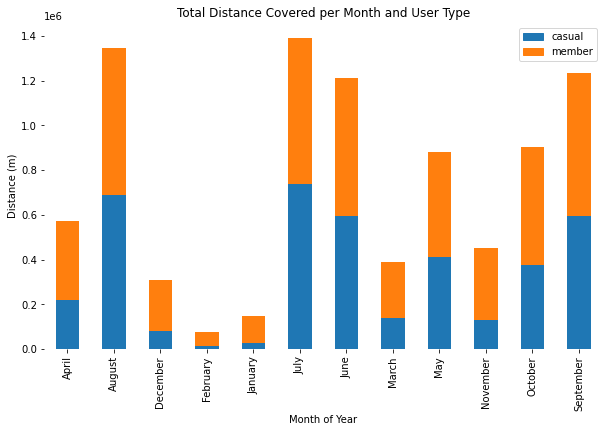

In [109]:
import matplotlib.pyplot as plt

# Sum of distance covered per season for each month
season_month_distance = df_sample.groupby(['member_casual', 'month_of_year']).distance.sum()

# Reshape the data for a stacked bar chart
season_month_distance = season_month_distance.unstack(level=0)

# Define the colors for each category
colors = {'casual': '#1f77b4', 'member': '#ff7f0e'}

# Plot the stacked bar chart
ax = season_month_distance.plot(kind='bar', stacked=True, color=colors.values(), figsize=(10,6))

# Set the title and axis labels
ax.set_title('Total Distance Covered per Month and User Type')
ax.set_xlabel('Month of Year')
ax.set_ylabel('Distance (m)')

# Add the legend
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in season_month_distance.columns]
ax.legend(handles, season_month_distance.columns, loc='upper right')

# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove ticks from top and right spines
ax.tick_params(top=False, right=False)

# Show the chart
plt.show()


### 🔍  members covered significantly greater distance than casuals in most months. However, there were a few months where casuals covered more distance than members, such as August and July.

In [238]:
# Sum of distance covered for each day of week
day_distance = df_sample.groupby(['day_of_week'])['distance'].sum()
display(day_distance)


day_of_week
Friday       1.269050e+06
Monday       1.080244e+06
Saturday     1.678648e+06
Sunday       1.427091e+06
Thursday     1.144887e+06
Tuesday      1.143750e+06
Wednesday    1.180592e+06
Name: distance, dtype: float64

In [221]:
# Sum of distance covered for each day of week per user type.
day_distance = df_sample.groupby(['day_of_week', 'member_casual'])['distance'].sum()
print(day_distance)


day_of_week  member_casual
Friday       casual           572163.190875
             member           696886.794500
Monday       casual           426761.350365
             member           653482.874189
Saturday     casual           956077.331150
             member           722570.769776
Sunday       casual           800566.906282
             member           626523.609678
Thursday     casual           435807.652565
             member           709079.156886
Tuesday      casual           407664.526282
             member           736085.839539
Wednesday    casual           420739.931077
             member           759852.489546
Name: distance, dtype: float64


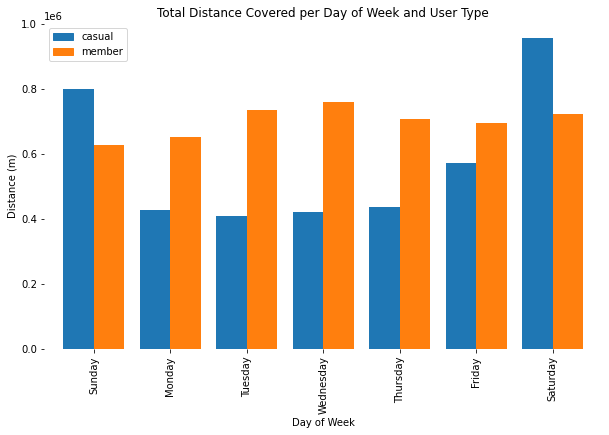

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the order of the days of the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Sum of distance covered for each day of the week per user type
day_distance = df_sample.groupby(['day_of_week', 'member_casual'])['distance'].sum()

# Reshape the data for a grouped bar chart
day_distance = day_distance.unstack(level=1)
day_distance.index = pd.Categorical(day_distance.index, categories=day_order, ordered=True)
day_distance = day_distance.sort_index()

# Define the colors for each category
colors = {'casual': '#1f77b4', 'member': '#ff7f0e'}

# Plot the grouped bar chart
ax = day_distance.plot(kind='bar', width=0.8, color=colors.values(), figsize=(10,6))

# Set the title and axis labels
ax.set_title('Total Distance Covered per Day of Week and User Type')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Distance (m)')

# Add the legend
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in day_distance.columns]
ax.legend(handles, day_distance.columns, loc='upper left')

# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove ticks from top and right spines
ax.tick_params(top=False, right=False)

# Show the chart
plt.show()


### 🔍  Casual users covered the most distance on Saturdays with 946K KM ,while members covered the most distance on Wednesday with 760K KM.

In [17]:
# Sum of distance covered per user for each time of day
df_time = df_sample.groupby(['time_of_day'])['distance'].sum()
print(df_time)

time_of_day
Afternoon    3.047896e+06
Evening      2.685001e+06
Morning      2.116575e+06
Night        1.074790e+06
Name: distance, dtype: float64


In [222]:
# Sum of distance covered per user for each time of day
df_time = df_sample.groupby(['time_of_day', 'member_casual'])['distance'].sum()
print(df_time)

time_of_day  member_casual
Afternoon    casual           1.490325e+06
             member           1.557571e+06
Evening      casual           1.184851e+06
             member           1.500150e+06
Morning      casual           7.319881e+05
             member           1.384587e+06
Night        casual           6.126167e+05
             member           4.621737e+05
Name: distance, dtype: float64


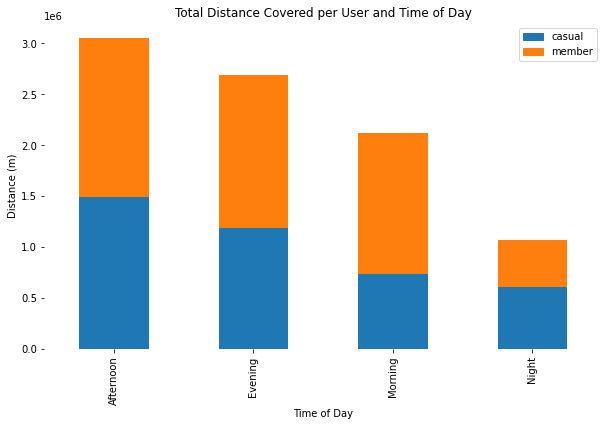

In [115]:
# Sum of distance covered per user for each time of day
df_time = df_sample.groupby(['time_of_day', 'member_casual'])['distance'].sum()

# Reshape the data for a stacked bar chart
df_time = df_time.unstack(level=1)

# Define the colors for each category
colors = {'casual': '#1f77b4', 'member': '#ff7f0e'}

# Plot the stacked bar chart
ax = df_time.plot(kind='bar', stacked=True, color=colors.values(), figsize=(10,6))

# Set the title and axis labels
ax.set_title('Total Distance Covered per User and Time of Day')
ax.set_xlabel('Time of Day')
ax.set_ylabel('Distance (m)')

# Add the legend
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in df_time.columns]
ax.legend(handles, df_time.columns, loc='upper right')

# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove ticks from top and right spines
ax.tick_params(top=False, right=False)

# Show the chart
plt.show()


### 🔍  Afternoon hours: casual riders covered 49% of the total distance while members covered 51%.

### 🔍  Evening hours: casual riders covered 50% of the total distance while members covered 50%.

### 🔍  Morning hours: casual riders covered 35% of the total distance while members covered 65%.

### 🔍  Night hours: casual riders covered 57% of the total distance while members only covered 43%.

In [224]:
hour_distance = df_sample.groupby(['start_hour'])['distance'].sum()
print(hour_distance)


start_hour
0     125898.245980
1      89761.269976
2      56209.426053
3      29866.899127
4      25069.583162
5      67129.600043
6     182366.037539
7     335387.387766
8     387244.515608
9     320224.234375
10    364759.174180
11    459464.226831
12    533522.320935
13    551982.029981
14    562019.246086
15    627894.900522
16    772477.220966
17    952912.696482
18    795380.249945
19    559228.739743
20    377479.371893
21    299538.299459
22    260167.286976
23    188279.459083
Name: distance, dtype: float64


In [121]:
hour_distance = df_sample.groupby(['start_hour', 'member_casual'])['distance'].sum()
print(hour_distance.tail(23))


start_hour  member_casual
12          member           265162.322191
13          casual           285595.619092
            member           266386.410890
14          casual           290754.264151
            member           271264.981935
15          casual           305580.975666
            member           322313.924856
16          casual           340033.906116
            member           432443.314850
17          casual           401589.291080
            member           551323.405402
18          casual           350220.966995
            member           445159.282950
19          casual           254784.403772
            member           304444.335971
20          casual           178256.658764
            member           199222.713129
21          casual           151403.874102
            member           148134.425357
22          casual           143423.313776
            member           116743.973200
23          casual           109536.967520
            member          

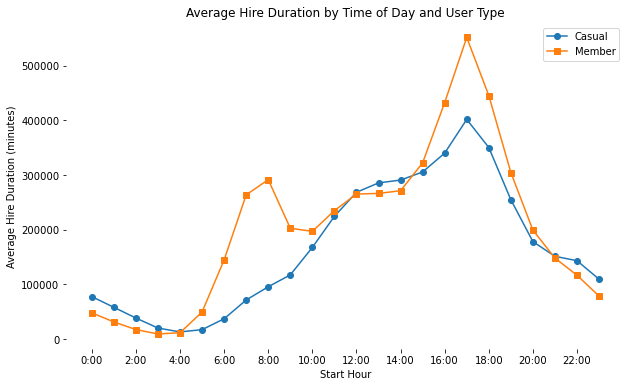

In [119]:
# Group the data by user type and time of day and calculate the mean hire duration
hour_distance = df_sample.groupby(['member_casual', 'start_hour'])['distance'].sum()

# Pivot the data to create separate columns for casual and member riders
df_pivot = hour_distance.unstack(level=0)

# Create the line chart with markers
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_pivot['casual'], label='Casual', marker='o')
ax.plot(df_pivot['member'], label='Member', marker='s')

# Set tick values and labels for the x-axis
ax.set_xticks(range(0, 24, 2))
ax.set_xticklabels([f'{hour}:00' for hour in range(0, 24, 2)])

# Add labels and title
ax.set_xlabel('Start Hour')
ax.set_ylabel('Average Hire Duration (minutes)')
ax.set_title('Average Hire Duration by Time of Day and User Type')

# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove ticks from top and right spines
ax.tick_params(top=False, right=False)

# Add legend
ax.legend()

# Show the chart
plt.show()



### 🔍 For casual users, the distance traveled gradually increases from midnight to 8 AM and then experiences a sharp increase during the morning peak hours from 8 AM to 10 AM. After that, it remains high until 5 PM and gradually decreases afterward.

# Solutions:
## 🎯 Spring Season: 
### Convert Casuals to Annual Members with Targeted Incentives and Cost-Saving Communication Casuals have a longer average hire time in all seasons, however, in the Spring season casuals had a significantly longer ride time of 16.3 More Minutes compared to annual members. This can be a potential opportunity for the marketing team to convert casual riders into annual members. They could offer a discount or other incentives to casual riders who sign up for an annual membership during the Spring season. This could be particularly effective if The Marketing Team can communicate the potential cost savings to casual riders by becoming an annual member since casual riders tend to have longer ride times and therefore may benefit more from an annual membership than they realize.

.

## 🎯 Develop marketing campaigns specifically targeting casual riders during the month of May:
### Casuals have their most extended average hire times in May. I recommend offering promotions or incentives that encourage riders to rent bikes more frequently during this period, with the aim of increasing the number of annual memberships over time. The marketing team can highlight the benefits of an annual membership to casual riders, such as exclusive access to events or preferred bike availability. By emphasizing these benefits, casual riders may be more likely to see the value in becoming an annual member. Offering a free trial period for casual riders to experience the benefits of an annual membership. This will allow casual riders to try out the service before committing to a full annual membership. By experiencing the convenience and benefits of being an annual member, casual riders may be more likely to convert to an annual membership.

## 🎯 Sunday: Boosting Annual Memberships through Strategic Promotions and Community Collaborations
### Sunday mornings are the busiest time for casual riders with an average hire time of 32.01 minutes, followed by Sunday afternoons with an average hire time of 31.92 minutes. To convert casual riders to annual members during Sunday mornings and afternoons, the marketing team could consider offering a promotional discount for annual memberships during these peak times. This could be communicated through targeted email campaigns, social media posts, or in-app notifications.

### Casuals used Streeter Dr &Grand Ave as their destination and starting point as their Preferable route with 11652 trips. To attract Casuals to our annual services, Cyclists can partner with local businesses such as gyms and restaurants, and offer discounts on their purchases and other special perks during these hours, thereby creating a sense of belonging and care for our clients.

# 📌 Conclusion:
## The data analysis showed that casual riders and annual members use Cyclistic bikes differently, with casual riders renting bikes for longer durations on weekends and annual members using them primarily during weekdays. To increase annual memberships, Cyclistic should focus on targeting casual riders with tailored promotions and incentives. The marketing team can use data on the most popular hiring times to craft targeted marketing campaigns that speak directly to casual riders.





                                                                                            *END*